In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('connect.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,img_bin = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

In [3]:
# Structuring Element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Create an empty output image to hold values
thin = np.zeros(img_bin.shape,dtype='uint8')

img1 = img_bin.copy()
# Loop until erosion leads to an empty set
while (cv2.countNonZero(img1)!=0):
    # Erosion
    erode = cv2.erode(img1,kernel)
    # Opening on eroded image
    opening = cv2.morphologyEx(erode,cv2.MORPH_OPEN,kernel)
    # Subtract these two
    subset = erode - opening
    # Union of all previous sets
    thin = cv2.bitwise_or(subset,thin)
    # Set the eroded image for next iteration
    img1 = erode.copy()

In [4]:
thinned = cv2.ximgproc.thinning(img_bin,cv2.ximgproc.THINNING_ZHANGSUEN)

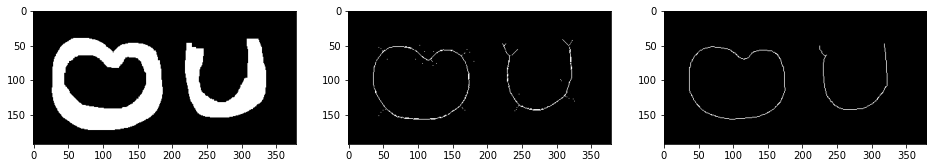

In [5]:
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(img_bin,cmap='gray')
plt.subplot(132)
plt.imshow(thin,cmap='gray')
plt.subplot(133)
plt.imshow(thinned,cmap='gray')

In [6]:
#https://rosettacode.org/wiki/Zhang-Suen_thinning_algorithm#Python
def intarray(binstring):
    '''Change a 2D matrix of 01 chars into a list of lists of ints'''
    return [[1 if ch == '1' else 0 for ch in line] 
            for line in binstring.strip().split()]
 
def chararray(intmatrix):
    '''Change a 2d list of lists of 1/0 ints into lines of 1/0 chars'''
    return '\n'.join(''.join(str(p) for p in row) for row in intmatrix)
 
def toTxt(intmatrix):
    '''Change a 2d list of lists of 1/0 ints into lines of '#' and '.' chars'''
    return '\n'.join(''.join(('#' if p else '.') for p in row) for row in intmatrix)
 
def neighbours(x, y, image):
    '''Return 8-neighbours of point p1 of picture, in order'''
    i = image
    x1, y1, x_1, y_1 = x+1, y-1, x-1, y+1
    #print ((x,y))
    return [i[y1][x],  i[y1][x1],   i[y][x1],  i[y_1][x1],  # P2,P3,P4,P5
            i[y_1][x], i[y_1][x_1], i[y][x_1], i[y1][x_1]]  # P6,P7,P8,P9
 
def transitions(neighbours):
    n = neighbours + neighbours[0:1]    # P2, ... P9, P2
    return sum((n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]))
 
def zhangSuen(image):
    changing1 = changing2 = [(-1, -1)]
    while changing1 or changing2:
        # Step 1
        changing1 = []
        for y in range(1, len(image) - 1):
            for x in range(1, len(image[0]) - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, image)
                if (image[y][x] == 1 and    # (Condition 0)
                    P4 * P6 * P8 == 0 and   # Condition 4
                    P2 * P4 * P6 == 0 and   # Condition 3
                    transitions(n) == 1 and # Condition 2
                    2 <= sum(n) <= 6):      # Condition 1
                    changing1.append((x,y))
        for x, y in changing1: image[y][x] = 0
        # Step 2
        changing2 = []
        for y in range(1, len(image) - 1):
            for x in range(1, len(image[0]) - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, image)
                if (image[y][x] == 1 and    # (Condition 0)
                    P2 * P6 * P8 == 0 and   # Condition 4
                    P2 * P4 * P8 == 0 and   # Condition 3
                    transitions(n) == 1 and # Condition 2
                    2 <= sum(n) <= 6):      # Condition 1
                    changing2.append((x,y))
        for x, y in changing2: image[y][x] = 0
        #print changing1
        #print changing2
    return image

In [13]:
img_zs = zhangSuen(img_bin/255.0)

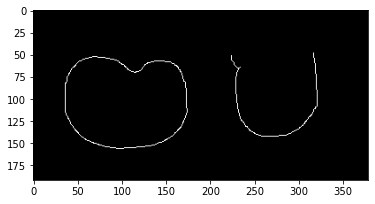

In [14]:
plt.imshow(img_zs,cmap='gray')